In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN


In [2]:
df1 = pd.read_csv('/Users/jluisfeltrer/Desktop/Analisis de datos/data_analysis_curso/e-cmn/E-commerce_mkechinov/merged_2019_C1.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.4+ GB


In [4]:
df1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


### Primera parte: Eliminar columnas innecesarias

In [6]:
# Eliminar las columnas 'user_session', 'event_time' y 'category_id' in place true
df1.drop(columns=['event_time', 'category_id', 'user_session'], inplace=True)

In [7]:
df1.head()

,event_type,product_id,category_code,brand,price,user_id
0,view,1003461,electronics.smartphone,xiaomi,489.07,520088904
1,view,5000088,appliances.sewing_machine,janome,293.65,530496790
2,view,17302664,NaN,creed,28.31,561587266
3,view,3601530,appliances.kitchen.washer,lg,712.87,518085591
4,view,1004775,electronics.smartphone,xiaomi,183.27,558856683


### Analisis inicial por columna

In [8]:
# Cuantos valores unicos hay en cada columna
df1.nunique()

event_type             3
product_id        206876
category_code        129
brand               4302
price              82966
user_id          5316649
dtype: int64

In [ ]:
# Cuantos valores unicos hay en la columna 'user_id'
df1['user_id'].nunique()

5316649

In [11]:
# Cuenta los valores unicos de la columna event_type
df1['event_type'].value_counts()

event_type
view        104335509
cart          3955446
purchase      1659788
Name: count, dtype: int64

In [9]:
# Porcentaje de cada valor unico en la columna event_type
df1['event_type'].value_counts(normalize=True)

event_type
view        0.948930
cart        0.035975
purchase    0.015096
Name: proportion, dtype: float64

In [9]:
# crea un df con los porcentajes de cada valor unico en la columna event_type
event_type_counts = df1['event_type'].value_counts(normalize=True).reset_index()
event_type_counts.columns = ['event_type', 'percentage']

/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_38277/2450843099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='event_type', data=event_type_counts, palette='viridis')


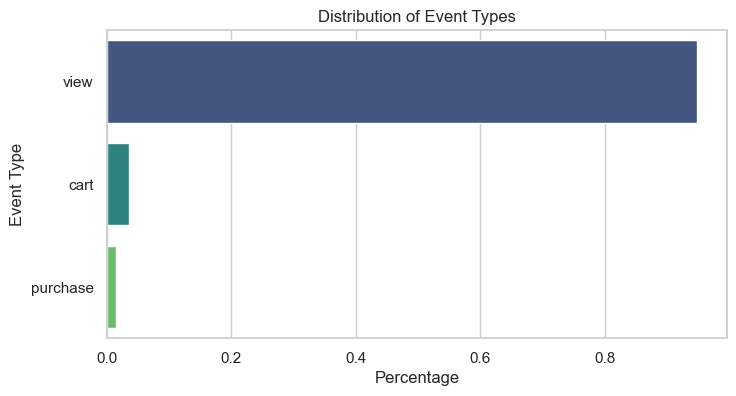

In [13]:
# visualizar los datos de event_type_counts en un barplot, barras horizontales
plt.figure(figsize=(8, 4))
sns.barplot(x='percentage', y='event_type', data=event_type_counts, palette='viridis')
plt.title('Distribution of Event Types')
plt.xlabel('Percentage')
plt.ylabel('Event Type')
plt.show()  

In [14]:
# Agrupa los valores por 'brand', numero y porcentaje de eventos por marca
brand_counts = df1['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']
brand_counts['percentage'] = brand_counts['count'] / brand_counts['count'].sum()


In [15]:
brand_counts.sort_values(by='count', ascending=False, inplace=True)

In [16]:
brand_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 0 to 4301
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       4302 non-null   object 
 1   count       4302 non-null   int64  
 2   percentage  4302 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.4+ KB


In [19]:
brand_counts.head()

,brand,count,percentage
0,samsung,13172020,0.139225
1,apple,10381933,0.109734
2,xiaomi,7721825,0.081618
3,huawei,2521331,0.026650
4,lucente,1840936,0.019458


/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_38277/3346119720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='brand', data=brand_counts, palette='viridis')


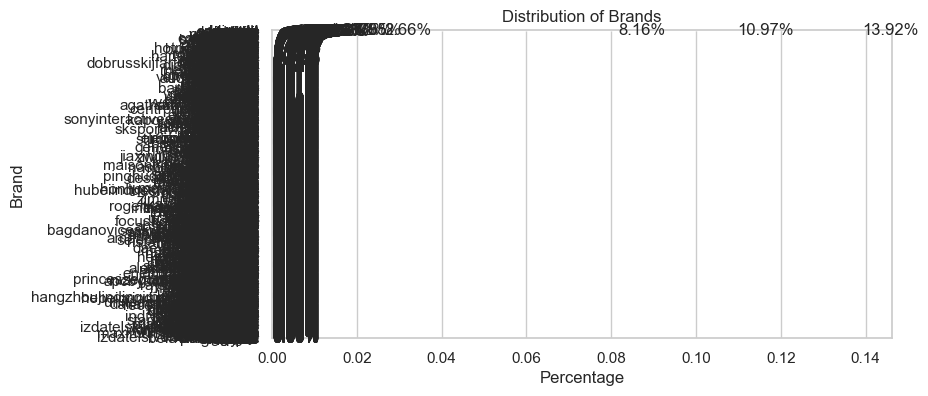

In [20]:
# Visualizar los datos de brand_counts solo porcentajes, con etiquetas en las barras
plt.figure(figsize=(8, 4))
sns.barplot(x='percentage', y='brand', data=brand_counts, palette='viridis')
plt.title('Distribution of Brands')
plt.xlabel('Percentage')
plt.ylabel('Brand')
for index, value in enumerate(brand_counts['percentage']):
    plt.text(value, index, f'{value:.2%}', va='center')
plt.show()

### Notas:
1.  Durante octubre y noviembre 2019, se registraron 109.950.742 eventos, de 5.316.649 clientes unicos
2.  Los valores Unicos de tipo de evento son 'view', 'cart' y 'purchase', con la siguiente proporcion:
    view        104335509
    cart          3955446
    purchase      1659788
    view        0.948930
    cart        0.035975
    purchase    0.015096